# Load CSV Data

In [1]:
import warnings
warnings.filterwarnings('ignore')

## read stock price

In [2]:
import pandas as pd
import numpy as np
data_dir = '../data/'
df_stock = pd.read_csv(data_dir+'AAPL.csv')
print(df_stock.shape)
df_stock.tail()

(7682, 7)


,Date,Open,High,Low,Close,Adj Close,Volume
7677,2020-06-19,354.640015,356.559998,345.149994,349.720001,349.720001,66119000
7678,2020-06-22,351.339996,359.459991,351.149994,358.869995,358.869995,33861300
7679,2020-06-23,364.000000,372.380005,362.269989,366.529999,366.529999,53038900
7680,2020-06-24,365.000000,368.790009,358.519989,360.059998,360.059998,48155800
7681,2020-06-25,360.700012,365.000000,357.570007,364.839996,364.839996,34380600


In [3]:
df_stock['Date'].iloc[0]

'1989-12-29'

## handle missing date of stock price data

In [4]:
from datetime import timedelta, date

def daterange(date1, date2):
    for n in range(int ((date2 - date1).days)+1):
        yield date1 + timedelta(n)

start_dt = date(1989, 12, 29)
end_dt = date(2020, 6, 26)
index = 0
for dt in daterange(start_dt, end_dt):
    date = dt.strftime("%Y-%m-%d")
#     print('date=', date)
    if df_stock['Date'].iloc[index] != date:
#         print('stock date=', df_stock['Date'].iloc[index])
        df_stock = df_stock.append({'Date':date},ignore_index=True)
    else:
        index+=1
# print(index)

In [5]:
print(df_stock.shape)
df_stock.tail(10)

(11138, 7)


,Date,Open,High,Low,Close,Adj Close,Volume
11128,2020-05-25,NaN,NaN,NaN,NaN,NaN,NaN
11129,2020-05-30,NaN,NaN,NaN,NaN,NaN,NaN
11130,2020-05-31,NaN,NaN,NaN,NaN,NaN,NaN
11131,2020-06-06,NaN,NaN,NaN,NaN,NaN,NaN
11132,2020-06-07,NaN,NaN,NaN,NaN,NaN,NaN
11133,2020-06-13,NaN,NaN,NaN,NaN,NaN,NaN
11134,2020-06-14,NaN,NaN,NaN,NaN,NaN,NaN
11135,2020-06-20,NaN,NaN,NaN,NaN,NaN,NaN
11136,2020-06-21,NaN,NaN,NaN,NaN,NaN,NaN
11137,2020-06-26,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df_stock['Close'].isna().sum()

3456

In [7]:
df_stock['Date']=pd.to_datetime(df_stock.Date)
df_stock = df_stock.sort_values(by='Date')
df_stock

,Date,Open,High,Low,Close,Adj Close,Volume
0,1989-12-29,1.241071,1.276786,1.227679,1.258929,1.018188,38102400.0
7682,1989-12-30,NaN,NaN,NaN,NaN,NaN,NaN
7683,1989-12-31,NaN,NaN,NaN,NaN,NaN,NaN
7684,1990-01-01,NaN,NaN,NaN,NaN,NaN,NaN
1,1990-01-02,1.258929,1.339286,1.250000,1.330357,1.075957,45799600.0
...,...,...,...,...,...,...,...
7678,2020-06-22,351.339996,359.459991,351.149994,358.869995,358.869995,33861300.0
7679,2020-06-23,364.000000,372.380005,362.269989,366.529999,366.529999,53038900.0
7680,2020-06-24,365.000000,368.790009,358.519989,360.059998,360.059998,48155800.0
7681,2020-06-25,360.700012,365.000000,357.570007,364.839996,364.839996,34380600.0


## fill missing data with previous appearing data

In [8]:
df_stock.fillna(method='ffill',inplace=True)
df_stock

,Date,Open,High,Low,Close,Adj Close,Volume
0,1989-12-29,1.241071,1.276786,1.227679,1.258929,1.018188,38102400.0
7682,1989-12-30,1.241071,1.276786,1.227679,1.258929,1.018188,38102400.0
7683,1989-12-31,1.241071,1.276786,1.227679,1.258929,1.018188,38102400.0
7684,1990-01-01,1.241071,1.276786,1.227679,1.258929,1.018188,38102400.0
1,1990-01-02,1.258929,1.339286,1.250000,1.330357,1.075957,45799600.0
...,...,...,...,...,...,...,...
7678,2020-06-22,351.339996,359.459991,351.149994,358.869995,358.869995,33861300.0
7679,2020-06-23,364.000000,372.380005,362.269989,366.529999,366.529999,53038900.0
7680,2020-06-24,365.000000,368.790009,358.519989,360.059998,360.059998,48155800.0
7681,2020-06-25,360.700012,365.000000,357.570007,364.839996,364.839996,34380600.0


In [9]:
df_stock['Close'].isna().sum()

0

## read quarterly balancesheet

In [10]:
df_bal = pd.read_csv(data_dir+'AAPL_quarterly_balance-sheet.csv',thousands=',')
print(df_bal.shape)
df_bal.head()

(91, 128)


,name,03/31/2020,12/31/2019,09/30/2019,06/30/2019,03/31/2019,12/31/2018,09/30/2018,06/30/2018,03/31/2018,...,12/31/1990,09/30/1990,06/30/1990,03/31/1990,12/31/1989,09/30/1989,09/30/1988,09/30/1987,09/30/1986,09/30/1985
0,TotalAssets,3.204000e+11,3.406180e+11,3.385160e+11,3.222390e+11,3.419980e+11,3.737190e+11,3.657250e+11,3.491970e+11,3.675020e+11,...,3.157300e+09,2.975700e+09,2.889500e+09,2.775700e+09,2.813300e+09,2.743900e+09,2.082100e+09,1.477900e+09,1.160100e+09,936200000.0
1,\tCurrentAssets,1.437530e+11,1.632310e+11,1.628190e+11,1.349730e+11,1.233460e+11,1.408280e+11,1.313390e+11,1.157610e+11,1.300530e+11,...,2.544000e+09,2.403300e+09,2.339000e+09,2.269700e+09,2.325500e+09,2.294400e+09,1.783000e+09,1.307400e+09,1.040900e+09,822100000.0
2,\t\tCashCashEquivalentsAndShortTermInvestments,9.405100e+10,1.071620e+11,1.005570e+11,9.461400e+10,8.009200e+10,8.642700e+10,6.630100e+10,7.097000e+10,8.794000e+10,...,7.393000e+08,3.747000e+08,6.650000e+08,6.458000e+08,4.105000e+08,4.383000e+08,5.457000e+08,5.651000e+08,5.762000e+08,337000000.0
3,\t\t\tCashAndCashEquivalents,4.017400e+10,3.977100e+10,4.884400e+10,5.053000e+10,3.798800e+10,4.477100e+10,2.591300e+10,3.197100e+10,4.505900e+10,...,7.393000e+08,3.747000e+08,6.650000e+08,6.458000e+08,4.105000e+08,4.383000e+08,5.457000e+08,5.651000e+08,5.762000e+08,337000000.0
4,\t\t\t\tCashFinancial,2.440500e+10,1.138300e+10,1.220400e+10,1.207500e+10,1.175100e+10,9.489000e+09,1.157500e+10,9.973000e+09,9.934000e+09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## quarterly cash flow

In [11]:
df_flow = pd.read_csv(data_dir+'AAPL_quarterly_cash-flow.csv',thousands=',')
print(df_flow.shape)
df_flow.head()

(70, 124)


,name,ttm,03/31/2020,12/31/2019,09/30/2019,06/30/2019,03/31/2019,12/31/2018,09/30/2018,06/30/2018,...,03/31/1992,12/31/1991,09/30/1991,06/30/1991,03/31/1991,12/31/1990,09/30/1990,06/30/1990,03/31/1990,12/31/1989
0,OperatingCashFlow,7.537300e+10,1.331100e+10,3.051600e+10,1.991000e+10,1.163600e+10,1.115500e+10,2.669000e+10,1.952300e+10,1.448800e+10,...,321300000.0,305700000.0,55400000.0,-135500000.0,-18100000.0,226900000.0,97700000.0,301800000.0,303300000.0,261100000.0
1,\tCashFlowFromContinuingOperatingActivities,7.537300e+10,1.331100e+10,3.051600e+10,1.991000e+10,1.163600e+10,1.115500e+10,2.669000e+10,1.952300e+10,1.448800e+10,...,321300000.0,305700000.0,55400000.0,-135500000.0,-18100000.0,226900000.0,97700000.0,301800000.0,303300000.0,261100000.0
2,\t\tNetIncomeFromContinuingOperations,5.721500e+10,1.124900e+10,2.223600e+10,1.368600e+10,1.004400e+10,1.156100e+10,1.996500e+10,1.412500e+10,1.151900e+10,...,135100000.0,166000000.0,81200000.0,-53100000.0,131200000.0,150500000.0,98500000.0,119700000.0,131900000.0,124800000.0
3,\t\tOperatingGainsLosses,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1800000.0,3500000.0,3000000.0,100000.0,3500000.0,400000.0,1000000.0,500000.0,200000.0,500000.0
4,\t\t\tGainLossOnSaleOfBusiness,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## quarterly financials

In [12]:
df_fian = pd.read_csv(data_dir+'AAPL_quarterly_financials.csv',thousands=',')
print(df_fian.shape)
df_fian.head()

(51, 141)


,name,ttm,03/31/2020,12/31/2019,09/30/2019,06/30/2019,03/31/2019,12/31/2018,09/30/2018,06/30/2018,...,12/31/1987,09/30/1987,06/30/1987,03/31/1987,12/31/1986,09/30/1986,06/30/1986,03/31/1986,12/31/1985,09/30/1985
0,TotalRevenue,2.679810e+11,5.831300e+10,9.181900e+10,6.404000e+10,5.380900e+10,5.801500e+10,8.431000e+10,6.290000e+10,5.326500e+10,...,1.042400e+09,786500000.0,637100000.0,575300000.0,662300000.0,510800000.0,448300000.0,408900000.0,533900000.0,409700000.0
1,\tOperatingRevenue,2.679810e+11,5.831300e+10,9.181900e+10,6.404000e+10,5.380900e+10,5.801500e+10,8.431000e+10,6.290000e+10,5.326500e+10,...,1.042400e+09,786500000.0,637100000.0,575300000.0,662300000.0,510800000.0,448300000.0,408900000.0,533900000.0,409700000.0
2,CostOfRevenue,1.658540e+11,3.594300e+10,5.660200e+10,3.972700e+10,3.358200e+10,3.619400e+10,5.227900e+10,3.881600e+10,3.284400e+10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,GrossProfit,1.021270e+11,2.237000e+10,3.521700e+10,2.431300e+10,2.022700e+10,2.182100e+10,3.203100e+10,2.408400e+10,2.042100e+10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,OperatingExpense,3.653600e+10,9.517000e+09,9.648000e+09,8.688000e+09,8.683000e+09,8.406000e+09,8.685000e+09,7.966000e+09,7.809000e+09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## quarterly valuation measures

In [13]:
df_measure = pd.read_csv(data_dir+'AAPL_quarterly_valuation_measures.csv',thousands=',')
print(df_measure.shape)
df_measure

(9, 141)


,name,ttm,03/31/2020,12/31/2019,09/30/2019,06/30/2019,03/31/2019,12/31/2018,09/30/2018,06/30/2018,...,12/31/1987,09/30/1987,06/30/1987,03/31/1987,12/31/1986,09/30/1986,06/30/1986,03/31/1986,12/31/1985,09/30/1985
0,MarketCap,1.581339e+12,1.099547e+12,1.287643e+12,9.951516e+11,9.106448e+11,8.956674e+11,7.460791e+11,1.090307e+12,9.098412e+11,...,5.273730e+09,7.123972e+09,5.072868e+09,4.039506e+09,2.578270e+09,2.098038e+09,2.283850e+09,1.769888e+09,1.359072e+09,9.741622e+08
1,EnterpriseValue,1.596795e+12,1.100677e+12,1.295133e+12,1.008956e+12,9.431828e+11,9.239704e+11,7.942611e+11,1.133937e+12,9.437412e+11,...,4.708630e+09,6.558872e+09,4.496668e+09,3.463306e+09,2.002070e+09,1.521838e+09,1.946850e+09,1.432888e+09,1.022072e+09,6.371622e+08
2,PeRatio,2.852500e+01,2.002300e+01,2.469700e+01,1.901300e+01,1.657600e+01,1.557000e+01,1.324400e+01,2.041000e+01,1.783300e+01,...,1.981100e+01,3.403600e+01,2.978000e+01,2.643500e+01,1.687500e+01,1.395800e+01,1.573500e+01,1.908800e+01,1.896600e+01,1.575100e+01
3,ForwardPeRatio,2.433100e+01,1.964600e+01,2.217300e+01,1.727100e+01,1.597400e+01,1.658400e+01,NaN,1.669500e+01,1.443000e+01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,PegRatio,2.023000e+00,1.580000e+00,2.029000e+00,2.036000e+00,1.450000e+00,1.821000e+00,NaN,1.285000e+00,1.110000e+00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,PsRatio,6.120000e+00,4.341000e+00,5.247000e+00,4.090000e+00,3.684000e+00,3.561000e+00,2.970000e+00,4.496000e+00,3.861000e+00,...,1.734000e+00,2.782000e+00,2.127000e+00,1.839000e+00,1.270000e+00,1.130000e+00,1.268000e+00,1.025000e+00,7.750000e-01,5.020000e-01
6,PbRatio,2.016400e+01,1.228100e+01,1.423000e+01,1.031700e+01,8.472000e+00,7.423000e+00,6.963000e+00,9.338000e+00,7.066000e+00,...,6.305000e+00,8.516000e+00,7.309000e+00,5.820000e+00,3.715000e+00,3.023000e+00,4.149000e+00,3.215000e+00,2.469000e+00,1.770000e+00
7,EnterprisesValueRevenueRatio,5.959000e+00,1.887500e+01,1.410500e+01,1.575500e+01,1.752800e+01,1.592600e+01,9.421000e+00,1.802800e+01,1.771800e+01,...,4.517000e+00,8.339000e+00,7.058000e+00,6.020000e+00,3.023000e+00,2.979000e+00,4.343000e+00,3.504000e+00,1.914000e+00,1.555000e+00
8,EnterprisesValueEBITDARatio,1.946800e+01,6.599600e+01,4.387500e+01,5.015700e+01,6.003700e+01,5.178300e+01,2.817400e+01,5.657500e+01,5.619200e+01,...,4.517000e+00,-4.364000e+00,7.058000e+00,6.020000e+00,3.023000e+00,-1.362000e+00,4.343000e+00,3.504000e+00,1.914000e+00,-4.680000e-01


# Transpose Dataframe by datatime

## clean Name helper function

In [14]:
def cleanName(df):
    col = 'name'
    if '\t' in df[col]:
        return df[col].replace('\t','')
    return df[col]

## transpose balance csv

In [15]:
df_bal['name']=df_bal.apply(cleanName,axis=1)
df_bal = df_bal.set_index('name').T
df_bal.reset_index(inplace=True)
df_bal.columns.values[0]='Date'
print(df_bal.shape)
df_bal.head()

(127, 92)


name,Date,TotalAssets,CurrentAssets,CashCashEquivalentsAndShortTermInvestments,CashAndCashEquivalents,CashFinancial,CashEquivalents,OtherShortTermInvestments,Receivables,AccountsReceivable,...,PreferredStockEquity,CommonStockEquity,NetTangibleAssets,WorkingCapital,InvestedCapital,TangibleBookValue,TotalDebt,NetDebt,ShareIssued,OrdinarySharesNumber
0,03/31/2020,3.204000e+11,1.437530e+11,9.405100e+10,4.017400e+10,2.440500e+10,1.576900e+10,5.387700e+10,3.067700e+10,1.572200e+10,...,NaN,7.842500e+10,7.842500e+10,4.765900e+10,1.879320e+11,7.842500e+10,1.095070e+11,6.933300e+10,4.323987e+09,4.323987e+09
1,12/31/2019,3.406180e+11,1.632310e+11,1.071620e+11,3.977100e+10,1.138300e+10,2.838800e+10,6.739100e+10,3.994600e+10,2.097000e+10,...,NaN,8.953100e+10,8.953100e+10,6.107000e+10,1.978230e+11,8.953100e+10,1.082920e+11,6.852100e+10,4.384027e+09,4.384027e+09
2,09/30/2019,3.385160e+11,1.628190e+11,1.005570e+11,4.884400e+10,1.220400e+10,3.664000e+10,5.171300e+10,4.580400e+10,2.292600e+10,...,NaN,9.048800e+10,9.048800e+10,5.710100e+10,1.985350e+11,9.048800e+10,1.080470e+11,5.920300e+10,4.443236e+09,4.443236e+09
3,06/30/2019,3.222390e+11,1.349730e+11,9.461400e+10,5.053000e+10,1.207500e+10,3.845500e+10,4.408400e+10,2.647400e+10,1.414800e+10,...,NaN,9.645600e+10,9.645600e+10,4.526900e+10,2.048740e+11,9.645600e+10,1.084180e+11,5.788800e+10,4.531395e+09,4.531395e+09
4,03/31/2019,3.419980e+11,1.233460e+11,8.009200e+10,3.798800e+10,1.175100e+10,2.623700e+10,4.210400e+10,2.627800e+10,1.508500e+10,...,NaN,1.058600e+11,1.058600e+11,2.957400e+10,2.184900e+11,1.058600e+11,1.126300e+11,7.464200e+10,4.607284e+09,4.607284e+09


## transpose cash flow csv

In [16]:
df_flow['name']=df_flow.apply(cleanName,axis=1)
df_flow = df_flow.set_index('name').T
df_flow.reset_index(inplace=True)
df_flow.columns.values[0]='Date'
print(df_flow.shape)
df_flow.head()

(123, 71)


name,Date,OperatingCashFlow,CashFlowFromContinuingOperatingActivities,NetIncomeFromContinuingOperations,OperatingGainsLosses,GainLossOnSaleOfBusiness,GainLossOnSaleOfPPE,GainLossOnInvestmentSecurities,DepreciationAmortizationDepletion,DepreciationAndAmortization,...,BeginningCashPosition,OtherCashAdjustmentOutsideChangeinCash,IncomeTaxPaidSupplementalData,InterestPaidSupplementalData,CapitalExpenditure,IssuanceOfCapitalStock,IssuanceOfDebt,RepaymentOfDebt,RepurchaseOfCapitalStock,FreeCashFlow
0,ttm,7.537300e+10,7.537300e+10,5.721500e+10,NaN,NaN,NaN,NaN,1.171400e+10,1.171400e+10,...,3.981700e+10,NaN,1.327100e+10,3.350000e+09,-8.737000e+09,821000000.0,1.324700e+10,-1.155500e+10,-7.367900e+10,6.663600e+10
1,03/31/2020,1.331100e+10,1.331100e+10,1.124900e+10,NaN,NaN,NaN,NaN,2.786000e+09,2.786000e+09,...,4.166500e+10,NaN,3.112000e+09,9.180000e+08,-1.853000e+09,428000000.0,4.074000e+09,-4.250000e+09,-1.857400e+10,1.145800e+10
2,12/31/2019,3.051600e+10,3.051600e+10,2.223600e+10,NaN,NaN,NaN,NaN,2.816000e+09,2.816000e+09,...,5.022400e+10,NaN,4.393000e+09,7.710000e+08,-2.107000e+09,2000000.0,2.210000e+09,-1.000000e+09,-2.070600e+10,2.840900e+10
3,09/30/2019,1.991000e+10,1.991000e+10,1.368600e+10,NaN,NaN,NaN,NaN,3.179000e+09,3.179000e+09,...,5.215100e+10,NaN,3.468000e+09,8.600000e+08,-2.777000e+09,390000000.0,6.963000e+09,-3.305000e+09,-1.744400e+10,1.713300e+10
4,06/30/2019,1.163600e+10,1.163600e+10,1.004400e+10,NaN,NaN,NaN,NaN,2.933000e+09,2.933000e+09,...,3.981700e+10,NaN,2.298000e+09,8.010000e+08,-2.000000e+09,1000000.0,0.000000e+00,-3.000000e+09,-1.695500e+10,9.636000e+09


## transpose financial csv

In [17]:
df_fian['name']=df_fian.apply(cleanName,axis=1)
df_fian = df_fian.set_index('name').T
df_fian.reset_index(inplace=True)
df_fian.columns.values[0]='Date'
print(df_fian.shape)
df_fian.head()

(140, 52)


name,Date,TotalRevenue,OperatingRevenue,CostOfRevenue,GrossProfit,OperatingExpense,SellingGeneralAndAdministration,ResearchAndDevelopment,DepreciationAmortizationDepletionIncomeStatement,DepreciationAndAmortizationInIncomeStatement,...,EBIT,EBITDA,ReconciledCostOfRevenue,ReconciledDepreciation,NetIncomeFromContinuingOperationNetMinorityInterest,TotalUnusualItemsExcludingGoodwill,TotalUnusualItems,NormalizedEBITDA,TaxRateForCalcs,TaxEffectOfUnusualItems
0,ttm,2.679810e+11,2.679810e+11,1.658540e+11,1.021270e+11,3.653600e+10,1.915300e+10,1.738300e+10,NaN,NaN,...,7.030900e+10,8.202300e+10,1.658540e+11,1.171400e+10,5.721500e+10,NaN,NaN,8.202300e+10,0.147,0.0
1,03/31/2020,5.831300e+10,5.831300e+10,3.594300e+10,2.237000e+10,9.517000e+09,4.952000e+09,4.565000e+09,NaN,NaN,...,1.389200e+10,NaN,3.594300e+10,2.786000e+09,1.124900e+10,NaN,NaN,1.667800e+10,0.144,0.0
2,12/31/2019,9.181900e+10,9.181900e+10,5.660200e+10,3.521700e+10,9.648000e+09,5.197000e+09,4.451000e+09,NaN,NaN,...,2.670300e+10,NaN,5.660200e+10,2.816000e+09,2.223600e+10,NaN,NaN,2.951900e+10,0.142,0.0
3,09/30/2019,6.404000e+10,6.404000e+10,3.972700e+10,2.431300e+10,8.688000e+09,4.578000e+09,4.110000e+09,NaN,NaN,...,1.693700e+10,NaN,3.972700e+10,3.179000e+09,1.368600e+10,NaN,NaN,2.011600e+10,0.151,0.0
4,06/30/2019,5.380900e+10,5.380900e+10,3.358200e+10,2.022700e+10,8.683000e+09,4.426000e+09,4.257000e+09,NaN,NaN,...,1.277700e+10,NaN,3.358200e+10,2.933000e+09,1.004400e+10,NaN,NaN,1.571000e+10,0.157,0.0


## transpose measure csv

In [18]:
df_measure['name']=df_measure.apply(cleanName,axis=1)
df_measure = df_measure.set_index('name').T
df_measure.reset_index(inplace=True)
df_measure.columns.values[0]='Date'
print(df_measure.shape)
df_measure.head()

(140, 10)


name,Date,MarketCap,EnterpriseValue,PeRatio,ForwardPeRatio,PegRatio,PsRatio,PbRatio,EnterprisesValueRevenueRatio,EnterprisesValueEBITDARatio
0,ttm,1.581339e+12,1.596795e+12,28.525,24.331,2.023,6.120,20.164,5.959,19.468
1,03/31/2020,1.099547e+12,1.100677e+12,20.023,19.646,1.580,4.341,12.281,18.875,65.996
2,12/31/2019,1.287643e+12,1.295133e+12,24.697,22.173,2.029,5.247,14.230,14.105,43.875
3,09/30/2019,9.951516e+11,1.008956e+12,19.013,17.271,2.036,4.090,10.317,15.755,50.157
4,06/30/2019,9.106448e+11,9.431828e+11,16.576,15.974,1.450,3.684,8.472,17.528,60.037


# Handle Date value

In [19]:
from datetime import datetime
# remove ttm
df_bal=df_bal.loc[df_bal['Date']!='ttm']
df_flow=df_flow.loc[df_flow['Date']!='ttm']
df_fian=df_fian.loc[df_fian['Date']!='ttm']
df_measure=df_measure.loc[df_measure['Date']!='ttm']

# convert Date column from object to datetime object
# df_stock['Date']=pd.to_datetime(df_stock['Date'])
df_bal['Date']=pd.to_datetime(df_bal['Date'])
df_flow['Date']=pd.to_datetime(df_flow['Date'])
df_fian['Date']=pd.to_datetime(df_fian['Date'])
df_measure['Date']=pd.to_datetime(df_measure['Date'])
df_fian.head()

name,Date,TotalRevenue,OperatingRevenue,CostOfRevenue,GrossProfit,OperatingExpense,SellingGeneralAndAdministration,ResearchAndDevelopment,DepreciationAmortizationDepletionIncomeStatement,DepreciationAndAmortizationInIncomeStatement,...,EBIT,EBITDA,ReconciledCostOfRevenue,ReconciledDepreciation,NetIncomeFromContinuingOperationNetMinorityInterest,TotalUnusualItemsExcludingGoodwill,TotalUnusualItems,NormalizedEBITDA,TaxRateForCalcs,TaxEffectOfUnusualItems
1,2020-03-31,5.831300e+10,5.831300e+10,3.594300e+10,2.237000e+10,9.517000e+09,4.952000e+09,4.565000e+09,NaN,NaN,...,1.389200e+10,NaN,3.594300e+10,2.786000e+09,1.124900e+10,NaN,NaN,1.667800e+10,0.144,0.0
2,2019-12-31,9.181900e+10,9.181900e+10,5.660200e+10,3.521700e+10,9.648000e+09,5.197000e+09,4.451000e+09,NaN,NaN,...,2.670300e+10,NaN,5.660200e+10,2.816000e+09,2.223600e+10,NaN,NaN,2.951900e+10,0.142,0.0
3,2019-09-30,6.404000e+10,6.404000e+10,3.972700e+10,2.431300e+10,8.688000e+09,4.578000e+09,4.110000e+09,NaN,NaN,...,1.693700e+10,NaN,3.972700e+10,3.179000e+09,1.368600e+10,NaN,NaN,2.011600e+10,0.151,0.0
4,2019-06-30,5.380900e+10,5.380900e+10,3.358200e+10,2.022700e+10,8.683000e+09,4.426000e+09,4.257000e+09,NaN,NaN,...,1.277700e+10,NaN,3.358200e+10,2.933000e+09,1.004400e+10,NaN,NaN,1.571000e+10,0.157,0.0
5,2019-03-31,5.801500e+10,5.801500e+10,3.619400e+10,2.182100e+10,8.406000e+09,4.458000e+09,3.948000e+09,NaN,NaN,...,1.480300e+10,NaN,3.619400e+10,3.040000e+09,1.156100e+10,NaN,NaN,1.784300e+10,0.162,0.0


# Merge dataframes by Date as Identifier

In [20]:
from functools import reduce
data_frames = [ df_flow, df_bal, df_fian, df_measure,df_stock]
df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['Date'],
                                            how='left'), data_frames).fillna(np.NaN)
df_merged.shape

(122, 228)

In [21]:
df_merged.tail()

,Date,OperatingCashFlow,CashFlowFromContinuingOperatingActivities,NetIncomeFromContinuingOperations,OperatingGainsLosses,GainLossOnSaleOfBusiness,GainLossOnSaleOfPPE,GainLossOnInvestmentSecurities,DepreciationAmortizationDepletion,DepreciationAndAmortization,...,PsRatio,PbRatio,EnterprisesValueRevenueRatio,EnterprisesValueEBITDARatio,Open,High,Low,Close,Adj Close,Volume
117,1990-12-31,226900000.0,226900000.0,150500000.0,400000.0,NaN,NaN,NaN,47100000.0,47100000.0,...,0.918,3.181,2.506,15.242,1.535714,1.544643,1.526786,1.535714,1.257481,11068400.0
118,1990-09-30,97700000.0,97700000.0,98500000.0,1000000.0,NaN,NaN,NaN,60800000.0,60800000.0,...,0.621,2.220,1.998,13.433,1.017857,1.035714,0.973214,1.035714,0.845239,44010400.0
119,1990-06-30,301800000.0,301800000.0,119700000.0,500000.0,NaN,NaN,NaN,49900000.0,49900000.0,...,0.996,3.453,3.465,20.368,1.535714,1.602679,1.526786,1.598214,1.300358,81298000.0
120,1990-03-31,303300000.0,303300000.0,131900000.0,200000.0,NaN,NaN,NaN,44200000.0,44200000.0,...,0.938,3.217,3.387,18.723,1.428571,1.464286,1.428571,1.437500,1.166358,55837600.0
121,1989-12-31,261100000.0,261100000.0,124800000.0,500000.0,NaN,NaN,NaN,47800000.0,47800000.0,...,0.856,2.971,2.700,16.955,1.241071,1.276786,1.227679,1.258929,1.018188,38102400.0


In [22]:
df_merged['Close'].isna().sum()

0

# Handle Missing data

In [23]:
def nan_checker(df):
    """
    The NaN checker

    Parameters
    ----------
    df : dataframe
    
    Returns
    ----------
    The dataframe of variables with NaN, their proportion of NaN and dtype
    """
    
    # Get the variables with NaN, their proportion of NaN and dtype
    df_nan = pd.DataFrame([[var, df[var].isna().sum() / df.shape[0], df[var].dtype]
                           for var in df.columns if df[var].isna().sum() > 0],
                          columns=['var', 'proportion', 'dtype'])
    
    # Sort df_nan in accending order of the proportion of NaN
    df_nan = df_nan.sort_values(by='proportion', ascending=False)
    
    return df_nan

In [24]:
df_nan = nan_checker(df_merged).reset_index(drop=True)
print(df_nan.shape)
print(df_nan.loc[df_nan['var']=='Close'])
df_miss = df_nan.loc[df_nan['proportion']>0.05]
df_miss
# df_nan.info()
# df_nan.tail(20)

(136, 3)
Empty DataFrame
Columns: [var, proportion, dtype]
Index: []


,var,proportion,dtype
0,EBITDA,1.000000,float64
1,OtherPayable,0.991803,float64
2,ReceivablesAdjustmentsAllowances,0.991803,float64
3,ChangeInIncomeTaxPayable,0.991803,float64
4,ChangeInTaxPayable,0.991803,float64
...,...,...,...
124,ResearchAndDevelopment,0.131148,float64
125,OtherCurrentLiabilities,0.106557,float64
126,PeRatio,0.098361,float64
127,NonCurrentDeferredTaxesLiabilities,0.057377,float64


## drop columns with missing value above 80%

In [25]:
df_drop = df_merged.drop(columns=np.intersect1d(df_miss['var'], df_merged.columns),
                           inplace=False)
# df_drop = df_merged.dropna(subset=['TotalAssets'])
print(df_drop.shape)
print(df_drop.columns)
df_drop.head(10)

(122, 99)
Index(['Date', 'OperatingCashFlow',
       'CashFlowFromContinuingOperatingActivities',
       'NetIncomeFromContinuingOperations',
       'DepreciationAmortizationDepletion', 'DepreciationAndAmortization',
       'DeferredTax', 'DeferredIncomeTax', 'ChangeInWorkingCapital',
       'ChangeInReceivables', 'ChangeInInventory',
       'ChangeInPayablesAndAccruedExpense', 'ChangeInOtherCurrentAssets',
       'ChangeInOtherCurrentLiabilities', 'InvestingCashFlow',
       'CashFlowFromContinuingInvestingActivities', 'NetPPEPurchaseAndSale',
       'PurchaseOfPPE', 'NetInvestmentPurchaseAndSale', 'PurchaseOfInvestment',
       'SaleOfInvestment', 'NetOtherInvestingChanges', 'FinancingCashFlow',
       'CashFlowFromContinuingFinancingActivities', 'NetCommonStockIssuance',
       'CommonStockIssuance', 'EndCashPosition', 'ChangesInCash',
       'BeginningCashPosition', 'CapitalExpenditure', 'IssuanceOfCapitalStock',
       'FreeCashFlow', 'TotalAssets', 'CurrentAssets',
       'CashCa

,Date,OperatingCashFlow,CashFlowFromContinuingOperatingActivities,NetIncomeFromContinuingOperations,DepreciationAmortizationDepletion,DepreciationAndAmortization,DeferredTax,DeferredIncomeTax,ChangeInWorkingCapital,ChangeInReceivables,...,PsRatio,PbRatio,EnterprisesValueRevenueRatio,EnterprisesValueEBITDARatio,Open,High,Low,Close,Adj Close,Volume
0,2020-03-31,1.331100e+10,1.331100e+10,1.124900e+10,2.786000e+09,2.786000e+09,-3.020000e+08,-3.020000e+08,-2.002000e+09,9.290000e+09,...,4.341,12.281,18.875,65.996,255.600006,262.489990,252.000000,254.289993,253.603500,49250500.0
1,2019-12-31,3.051600e+10,3.051600e+10,2.223600e+10,2.816000e+09,2.816000e+09,-3.490000e+08,-3.490000e+08,4.245000e+09,5.917000e+09,...,5.247,14.230,14.105,43.875,289.929993,293.679993,289.519989,293.649994,292.163818,25201400.0
2,2019-09-30,1.991000e+10,1.991000e+10,1.368600e+10,3.179000e+09,3.179000e+09,-3.020000e+08,-3.020000e+08,2.160000e+09,-1.932000e+10,...,4.090,10.317,15.755,50.157,220.899994,224.580002,220.789993,223.970001,222.169479,25977400.0
3,2019-06-30,1.163600e+10,1.163600e+10,1.004400e+10,2.933000e+09,2.933000e+09,8.600000e+07,8.600000e+07,-2.798000e+09,-2.140000e+08,...,3.684,8.472,17.528,60.037,198.679993,199.500000,197.050003,197.919998,195.585770,31110600.0
4,2019-03-31,1.115500e+10,1.115500e+10,1.156100e+10,3.040000e+09,3.040000e+09,-1.770000e+08,-1.770000e+08,-4.622000e+09,1.067500e+10,...,3.561,7.423,15.926,51.783,189.830002,190.080002,188.539993,189.949997,186.989685,23564000.0
5,2018-12-31,2.669000e+10,2.669000e+10,1.996500e+10,3.395000e+09,3.395000e+09,5.300000e+07,5.300000e+07,1.772000e+09,1.203500e+10,...,2.970,6.963,9.421,28.174,158.529999,159.360001,156.479996,157.740005,154.618546,35003500.0
6,2018-09-30,1.952300e+10,1.952300e+10,1.412500e+10,2.754000e+09,2.754000e+09,5.190000e+08,5.190000e+08,8.140000e+08,-2.262400e+10,...,4.496,9.338,18.028,56.575,224.789993,225.839996,224.020004,225.740005,220.503540,22929400.0
7,2018-06-30,1.448800e+10,1.448800e+10,1.151900e+10,2.665000e+09,2.665000e+09,1.126000e+09,1.126000e+09,-1.914000e+09,-3.946000e+09,...,3.861,7.066,17.718,56.192,186.289993,187.190002,182.910004,185.110001,180.184082,22737700.0
8,2018-03-31,1.513000e+10,1.513000e+10,1.382200e+10,2.739000e+09,2.739000e+09,-4.980000e+08,-4.980000e+08,-2.141000e+09,2.846800e+10,...,3.654,5.916,14.665,45.513,167.809998,171.750000,166.899994,167.779999,162.687927,38398500.0
9,2017-12-31,2.829300e+10,2.829300e+10,2.006500e+10,2.745000e+09,2.745000e+09,-3.373700e+10,-3.373700e+10,3.793500e+10,-1.523000e+10,...,3.877,6.415,10.220,29.578,170.520004,170.589996,169.220001,169.229996,163.427597,25999900.0


In [26]:
df_drop['Close']

0      254.289993
1      293.649994
2      223.970001
3      197.919998
4      189.949997
          ...    
117      1.535714
118      1.035714
119      1.598214
120      1.437500
121      1.258929
Name: Close, Length: 122, dtype: float64

In [27]:
df_drop.fillna(method='bfill',inplace=True)
df_drop.fillna(method='ffill',inplace=True)
df_drop.head(10)

,Date,OperatingCashFlow,CashFlowFromContinuingOperatingActivities,NetIncomeFromContinuingOperations,DepreciationAmortizationDepletion,DepreciationAndAmortization,DeferredTax,DeferredIncomeTax,ChangeInWorkingCapital,ChangeInReceivables,...,PsRatio,PbRatio,EnterprisesValueRevenueRatio,EnterprisesValueEBITDARatio,Open,High,Low,Close,Adj Close,Volume
0,2020-03-31,1.331100e+10,1.331100e+10,1.124900e+10,2.786000e+09,2.786000e+09,-3.020000e+08,-3.020000e+08,-2.002000e+09,9.290000e+09,...,4.341,12.281,18.875,65.996,255.600006,262.489990,252.000000,254.289993,253.603500,49250500.0
1,2019-12-31,3.051600e+10,3.051600e+10,2.223600e+10,2.816000e+09,2.816000e+09,-3.490000e+08,-3.490000e+08,4.245000e+09,5.917000e+09,...,5.247,14.230,14.105,43.875,289.929993,293.679993,289.519989,293.649994,292.163818,25201400.0
2,2019-09-30,1.991000e+10,1.991000e+10,1.368600e+10,3.179000e+09,3.179000e+09,-3.020000e+08,-3.020000e+08,2.160000e+09,-1.932000e+10,...,4.090,10.317,15.755,50.157,220.899994,224.580002,220.789993,223.970001,222.169479,25977400.0
3,2019-06-30,1.163600e+10,1.163600e+10,1.004400e+10,2.933000e+09,2.933000e+09,8.600000e+07,8.600000e+07,-2.798000e+09,-2.140000e+08,...,3.684,8.472,17.528,60.037,198.679993,199.500000,197.050003,197.919998,195.585770,31110600.0
4,2019-03-31,1.115500e+10,1.115500e+10,1.156100e+10,3.040000e+09,3.040000e+09,-1.770000e+08,-1.770000e+08,-4.622000e+09,1.067500e+10,...,3.561,7.423,15.926,51.783,189.830002,190.080002,188.539993,189.949997,186.989685,23564000.0
5,2018-12-31,2.669000e+10,2.669000e+10,1.996500e+10,3.395000e+09,3.395000e+09,5.300000e+07,5.300000e+07,1.772000e+09,1.203500e+10,...,2.970,6.963,9.421,28.174,158.529999,159.360001,156.479996,157.740005,154.618546,35003500.0
6,2018-09-30,1.952300e+10,1.952300e+10,1.412500e+10,2.754000e+09,2.754000e+09,5.190000e+08,5.190000e+08,8.140000e+08,-2.262400e+10,...,4.496,9.338,18.028,56.575,224.789993,225.839996,224.020004,225.740005,220.503540,22929400.0
7,2018-06-30,1.448800e+10,1.448800e+10,1.151900e+10,2.665000e+09,2.665000e+09,1.126000e+09,1.126000e+09,-1.914000e+09,-3.946000e+09,...,3.861,7.066,17.718,56.192,186.289993,187.190002,182.910004,185.110001,180.184082,22737700.0
8,2018-03-31,1.513000e+10,1.513000e+10,1.382200e+10,2.739000e+09,2.739000e+09,-4.980000e+08,-4.980000e+08,-2.141000e+09,2.846800e+10,...,3.654,5.916,14.665,45.513,167.809998,171.750000,166.899994,167.779999,162.687927,38398500.0
9,2017-12-31,2.829300e+10,2.829300e+10,2.006500e+10,2.745000e+09,2.745000e+09,-3.373700e+10,-3.373700e+10,3.793500e+10,-1.523000e+10,...,3.877,6.415,10.220,29.578,170.520004,170.589996,169.220001,169.229996,163.427597,25999900.0


## Check Missing data after cleaning

In [28]:
df_test = nan_checker(df_drop).reset_index(drop=True)
print(df_test.shape)
df_test.head()

(0, 3)


,var,proportion,dtype


In [29]:
for i in range(1, len(df_drop.columns)):
    df_drop.iloc[:,i] = pd.to_numeric(df_drop.iloc[:,i], errors='ignore')
df_clean = df_drop
print(df_clean.dtypes)
df_clean.head(10)

Date                                         datetime64[ns]
OperatingCashFlow                                   float64
CashFlowFromContinuingOperatingActivities           float64
NetIncomeFromContinuingOperations                   float64
DepreciationAmortizationDepletion                   float64
                                                  ...      
High                                                float64
Low                                                 float64
Close                                               float64
Adj Close                                           float64
Volume                                              float64
Length: 99, dtype: object


,Date,OperatingCashFlow,CashFlowFromContinuingOperatingActivities,NetIncomeFromContinuingOperations,DepreciationAmortizationDepletion,DepreciationAndAmortization,DeferredTax,DeferredIncomeTax,ChangeInWorkingCapital,ChangeInReceivables,...,PsRatio,PbRatio,EnterprisesValueRevenueRatio,EnterprisesValueEBITDARatio,Open,High,Low,Close,Adj Close,Volume
0,2020-03-31,1.331100e+10,1.331100e+10,1.124900e+10,2.786000e+09,2.786000e+09,-3.020000e+08,-3.020000e+08,-2.002000e+09,9.290000e+09,...,4.341,12.281,18.875,65.996,255.600006,262.489990,252.000000,254.289993,253.603500,49250500.0
1,2019-12-31,3.051600e+10,3.051600e+10,2.223600e+10,2.816000e+09,2.816000e+09,-3.490000e+08,-3.490000e+08,4.245000e+09,5.917000e+09,...,5.247,14.230,14.105,43.875,289.929993,293.679993,289.519989,293.649994,292.163818,25201400.0
2,2019-09-30,1.991000e+10,1.991000e+10,1.368600e+10,3.179000e+09,3.179000e+09,-3.020000e+08,-3.020000e+08,2.160000e+09,-1.932000e+10,...,4.090,10.317,15.755,50.157,220.899994,224.580002,220.789993,223.970001,222.169479,25977400.0
3,2019-06-30,1.163600e+10,1.163600e+10,1.004400e+10,2.933000e+09,2.933000e+09,8.600000e+07,8.600000e+07,-2.798000e+09,-2.140000e+08,...,3.684,8.472,17.528,60.037,198.679993,199.500000,197.050003,197.919998,195.585770,31110600.0
4,2019-03-31,1.115500e+10,1.115500e+10,1.156100e+10,3.040000e+09,3.040000e+09,-1.770000e+08,-1.770000e+08,-4.622000e+09,1.067500e+10,...,3.561,7.423,15.926,51.783,189.830002,190.080002,188.539993,189.949997,186.989685,23564000.0
5,2018-12-31,2.669000e+10,2.669000e+10,1.996500e+10,3.395000e+09,3.395000e+09,5.300000e+07,5.300000e+07,1.772000e+09,1.203500e+10,...,2.970,6.963,9.421,28.174,158.529999,159.360001,156.479996,157.740005,154.618546,35003500.0
6,2018-09-30,1.952300e+10,1.952300e+10,1.412500e+10,2.754000e+09,2.754000e+09,5.190000e+08,5.190000e+08,8.140000e+08,-2.262400e+10,...,4.496,9.338,18.028,56.575,224.789993,225.839996,224.020004,225.740005,220.503540,22929400.0
7,2018-06-30,1.448800e+10,1.448800e+10,1.151900e+10,2.665000e+09,2.665000e+09,1.126000e+09,1.126000e+09,-1.914000e+09,-3.946000e+09,...,3.861,7.066,17.718,56.192,186.289993,187.190002,182.910004,185.110001,180.184082,22737700.0
8,2018-03-31,1.513000e+10,1.513000e+10,1.382200e+10,2.739000e+09,2.739000e+09,-4.980000e+08,-4.980000e+08,-2.141000e+09,2.846800e+10,...,3.654,5.916,14.665,45.513,167.809998,171.750000,166.899994,167.779999,162.687927,38398500.0
9,2017-12-31,2.829300e+10,2.829300e+10,2.006500e+10,2.745000e+09,2.745000e+09,-3.373700e+10,-3.373700e+10,3.793500e+10,-1.523000e+10,...,3.877,6.415,10.220,29.578,170.520004,170.589996,169.220001,169.229996,163.427597,25999900.0


## EDA for cleaned data before training

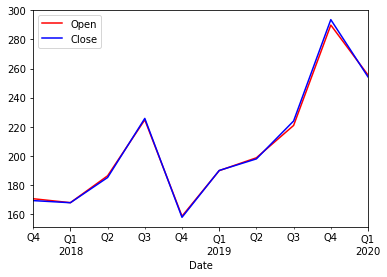

In [30]:
import matplotlib.pyplot as plt
ax = plt.gca()
df_clean.head(10).plot(kind='line',x='Date',y='Open',color='red',ax=ax)
df_clean.head(10).plot(kind='line',x='Date',y='Close',color='blue',ax=ax)
plt.show()

# Remove duplicated columns by value

In [31]:
# before drop
df_clean.head()

,Date,OperatingCashFlow,CashFlowFromContinuingOperatingActivities,NetIncomeFromContinuingOperations,DepreciationAmortizationDepletion,DepreciationAndAmortization,DeferredTax,DeferredIncomeTax,ChangeInWorkingCapital,ChangeInReceivables,...,PsRatio,PbRatio,EnterprisesValueRevenueRatio,EnterprisesValueEBITDARatio,Open,High,Low,Close,Adj Close,Volume
0,2020-03-31,1.331100e+10,1.331100e+10,1.124900e+10,2.786000e+09,2.786000e+09,-302000000.0,-302000000.0,-2.002000e+09,9.290000e+09,...,4.341,12.281,18.875,65.996,255.600006,262.489990,252.000000,254.289993,253.603500,49250500.0
1,2019-12-31,3.051600e+10,3.051600e+10,2.223600e+10,2.816000e+09,2.816000e+09,-349000000.0,-349000000.0,4.245000e+09,5.917000e+09,...,5.247,14.230,14.105,43.875,289.929993,293.679993,289.519989,293.649994,292.163818,25201400.0
2,2019-09-30,1.991000e+10,1.991000e+10,1.368600e+10,3.179000e+09,3.179000e+09,-302000000.0,-302000000.0,2.160000e+09,-1.932000e+10,...,4.090,10.317,15.755,50.157,220.899994,224.580002,220.789993,223.970001,222.169479,25977400.0
3,2019-06-30,1.163600e+10,1.163600e+10,1.004400e+10,2.933000e+09,2.933000e+09,86000000.0,86000000.0,-2.798000e+09,-2.140000e+08,...,3.684,8.472,17.528,60.037,198.679993,199.500000,197.050003,197.919998,195.585770,31110600.0
4,2019-03-31,1.115500e+10,1.115500e+10,1.156100e+10,3.040000e+09,3.040000e+09,-177000000.0,-177000000.0,-4.622000e+09,1.067500e+10,...,3.561,7.423,15.926,51.783,189.830002,190.080002,188.539993,189.949997,186.989685,23564000.0


In [32]:
df_clean = df_clean.T.drop_duplicates().T

# Start Data Modeling

# Get target label

In [33]:
target = 'Close'

## Split Data into train test

In [34]:
from sklearn.model_selection import train_test_split

# copy df_clean
df_train = df_clean.copy()
df_train, df_test = df_train.iloc[37:,], df_train.iloc[:37,]
# Divide the training data into training (80%) and validation (20%)
# df_train, df_valid = df_train.iloc[21:,], df_train.iloc[:21,]

# Reset the index
df_train, df_test = df_train.reset_index(drop=True),  df_test.reset_index(drop=True)

## View train test dataframe

In [35]:
print(df_train.shape)
df_train.head()

(85, 85)


,Date,OperatingCashFlow,NetIncomeFromContinuingOperations,DepreciationAmortizationDepletion,DeferredTax,ChangeInWorkingCapital,ChangeInReceivables,ChangeInInventory,ChangeInPayablesAndAccruedExpense,ChangeInOtherCurrentAssets,...,PsRatio,PbRatio,EnterprisesValueRevenueRatio,EnterprisesValueEBITDARatio,Open,High,Low,Close,Adj Close,Volume
0,2010-12-31,9.773e+09,6.004e+09,3.56e+08,8.23e+08,2.291e+09,-9.5e+08,1.66e+08,2.346e+09,-5.58e+08,...,3.924,5.435,10.101,33.009,46.1357,46.2114,45.9014,46.08,39.8913,4.8377e+07
1,2010-09-30,5.683e+09,4.308e+09,3.29e+08,1.42e+08,6.7e+08,-3.525e+09,-1.09e+08,3.495e+09,-5.7e+08,...,4.023,5.438,11.517,40.562,41.2857,41.4286,40.1786,40.5357,35.0917,1.68348e+08
2,2010-06-30,4.801e+09,3.253e+09,2.73e+08,4.05e+08,6.46e+08,-1.817e+09,-3.04e+08,2.83e+09,-1.2e+08,...,4.568,5.33,13.088,45.591,36.6729,36.8529,35.7157,35.9329,31.107,1.84863e+08
3,2010-03-31,2.33e+09,3.074e+09,2.16e+08,4.68e+08,-1.662e+09,2.11e+08,-6.2e+07,-9.74e+08,-3.07e+08,...,4.813,5.433,14.12,45.437,33.6414,33.8014,33.4943,33.5714,29.0627,1.07665e+08
4,2009-12-31,5.781e+09,3.378e+09,2.09e+08,4.25e+08,1.558e+09,2.71e+08,-1.21e+08,9.56e+08,-5.17e+08,...,4.762,5.339,10.597,33.682,30.4471,30.4786,30.08,30.1043,26.0612,8.81027e+07


In [36]:
# print(df_valid.shape)
# df_valid.head()

In [37]:
print(df_test.shape)
df_test.head()

(37, 85)


,Date,OperatingCashFlow,NetIncomeFromContinuingOperations,DepreciationAmortizationDepletion,DeferredTax,ChangeInWorkingCapital,ChangeInReceivables,ChangeInInventory,ChangeInPayablesAndAccruedExpense,ChangeInOtherCurrentAssets,...,PsRatio,PbRatio,EnterprisesValueRevenueRatio,EnterprisesValueEBITDARatio,Open,High,Low,Close,Adj Close,Volume
0,2020-03-31,1.3311e+10,1.1249e+10,2.786e+09,-3.02e+08,-2.002e+09,9.29e+09,7.27e+08,-1.2431e+10,-1.812e+09,...,4.341,12.281,18.875,65.996,255.6,262.49,252,254.29,253.603,4.92505e+07
1,2019-12-31,3.0516e+10,2.2236e+10,2.816e+09,-3.49e+08,4.245e+09,5.917e+09,-2.8e+07,-1.089e+09,-7.054e+09,...,5.247,14.23,14.105,43.875,289.93,293.68,289.52,293.65,292.164,2.52014e+07
2,2019-09-30,1.991e+10,1.3686e+10,3.179e+09,-3.02e+08,2.16e+09,-1.932e+10,-7.85e+08,1.7881e+10,1.8e+08,...,4.09,10.317,15.755,50.157,220.9,224.58,220.79,223.97,222.169,2.59774e+07
3,2019-06-30,1.1636e+10,1.0044e+10,2.933e+09,8.6e+07,-2.798e+09,-2.14e+08,1.502e+09,2.2e+08,1.41e+09,...,3.684,8.472,17.528,60.037,198.68,199.5,197.05,197.92,195.586,3.11106e+07
4,2019-03-31,1.1155e+10,1.1561e+10,3.04e+09,-1.77e+08,-4.622e+09,1.0675e+10,7e+07,-1.1523e+10,1.69e+08,...,3.561,7.423,15.926,51.783,189.83,190.08,188.54,189.95,186.99,2.3564e+07


## Split date from data

In [38]:
df_train_date, df_train = df_train.iloc[:,:1], df_train.iloc[:,1:]

# df_valid_date, df_valid = df_valid.iloc[:,:1], df_valid.iloc[:,1:]

df_test_date, df_test = df_test.iloc[:,:1], df_test.iloc[:,1:]

In [39]:
df_test_date

,Date
0,2020-03-31
1,2019-12-31
2,2019-09-30
3,2019-06-30
4,2019-03-31
5,2018-12-31
6,2018-09-30
7,2018-06-30
8,2018-03-31
9,2017-12-31


## Drop unnecessary columns

### Get Features

In [40]:
col_drop = ['Open','High', 'Low', 'Adj Close']
# get features
features = np.setdiff1d(df_train.columns, [target]+col_drop)


In [41]:
X_train = df_train[features].to_numpy()
# X_valid = df_valid[features].to_numpy()
X_test = df_test[features].to_numpy()

y_train = df_train[target].to_numpy()
# y_valid = df_valid[target].to_numpy()
y_test = df_test[target].to_numpy()

## Scale data

In [42]:
from sklearn import preprocessing
mms = preprocessing.MinMaxScaler()
# Normalize the training data
X_train = mms.fit_transform(X_train)

# Normalize the training data
# X_valid = mms.fit_transform(X_valid)

# Normalize the validation data
X_test = mms.transform(X_test)

## Training data

In [43]:
from sklearn.linear_model import LinearRegression

# The LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [44]:
# Print the intercept (w0) and coefficient (w1) of the trained model
round(pd.DataFrame([[lr.intercept_, lr.coef_[0]]], columns=['w0', 'w1']), 9)

,w0,w1
0,9.224646,2.510847


In [45]:

from sklearn.metrics import mean_squared_error
# Get the prediction on the validation data using lr
y_test_pred = lr.predict(X_test)

# Print the mean squared error
pd.DataFrame([mean_squared_error(y_test, y_test_pred)], columns=['mean squared error'])

,mean squared error
0,273.543984


In [46]:
lr.score(X_test, y_test)

0.9234087707703198

In [47]:
lr.coef_

array([ 2.51084687e+00, -1.28129626e+00, -9.06382937e-01, -3.13894570e+00,
        1.11283880e+00, -4.67843949e+00,  4.83701080e-03,  2.35976525e-01,
        3.65451757e-01,  3.11055685e-01,  9.51379127e-01, -5.05712803e+00,
        1.80874030e+00,  3.29727731e+01, -9.99803650e-01,  8.31536304e+01,
        2.72132559e+00,  2.29495795e+00, -1.11590020e+00, -1.97391216e+01,
       -4.55816119e+02, -5.92210093e-01,  5.03385444e+00,  4.18752086e-02,
       -9.85720479e-01, -3.51436813e-01,  3.67192856e+00,  4.03385056e-01,
       -1.78320018e+01, -1.92301532e-01,  7.52419351e+00, -1.86975921e+00,
        7.97725370e-01,  3.60977819e+01,  1.54374438e-01,  3.46797267e+00,
        4.27532870e+03, -3.90999870e+03, -1.73299318e+00,  1.20512044e-01,
        1.69630564e-02,  2.39471005e+00, -1.71321314e+01, -1.21943527e+00,
        4.62541504e+02, -3.19541326e+02,  3.62320873e+00, -8.66330282e+00,
       -1.95768996e+01, -4.35538945e-01,  1.09447626e+00, -6.11624322e+00,
        8.44327224e-01,  

In [48]:
y_test

array([254.289993, 293.649994, 223.97000099999997, 197.919998, 189.949997,
       157.740005, 225.74000499999997, 185.110001, 167.779999, 169.229996,
       154.119995, 144.020004, 143.66000400000001, 115.82, 113.050003,
       95.599998, 108.989998, 105.260002, 110.300003, 125.43, 124.43,
       110.379997, 100.75, 92.93, 76.677139, 80.145714, 68.10714,
       56.647144, 63.237143999999994, 76.024284, 95.300003, 83.428574,
       85.650002, 57.85714300000001, 54.474284999999995, 47.952858,
       49.787144], dtype=object)

In [49]:
y_test_pred

array([215.16665563, 242.54066842, 188.25194223, 178.03781483,
       176.09514565, 155.5844261 , 193.32022812, 170.41374004,
       163.59527574, 153.86715003, 136.20118207, 131.15547136,
       130.85171583, 102.46883328, 104.05225742,  90.9092402 ,
       100.26822393,  95.98504188,  93.9674042 , 104.9820644 ,
       111.86286738,  97.87386869,  86.48696629,  81.56072737,
        70.38470789,  73.13389033,  65.46916113,  53.03409254,
        65.76362386,  74.48606587,  95.14145701,  86.65282982,
        86.83536666,  58.43778995,  60.14264552,  49.46470186,
        49.40460928])

In [50]:

df_predict_test = pd.DataFrame([y_test_pred,y_test],columns=df_test_date['Date'])
df_predict_test

Date,2020-03-31,2019-12-31,2019-09-30,2019-06-30,2019-03-31,2018-12-31,2018-09-30,2018-06-30,2018-03-31,2017-12-31,...,2013-06-30,2013-03-31,2012-12-31,2012-09-30,2012-06-30,2012-03-31,2011-12-31,2011-09-30,2011-06-30,2011-03-31
0,215.166656,242.540668,188.251942,178.037815,176.095146,155.584426,193.320228,170.413740,163.595276,153.867150,...,53.034093,65.763624,74.486066,95.141457,86.652830,86.835367,58.437790,60.142646,49.464702,49.404609
1,254.289993,293.649994,223.970001,197.919998,189.949997,157.740005,225.740005,185.110001,167.779999,169.229996,...,56.647144,63.237144,76.024284,95.300003,83.428574,85.650002,57.857143,54.474285,47.952858,49.787144


# Scale cleaned dataframe

In [51]:
from sklearn.preprocessing import StandardScaler

new_features = np.setdiff1d(df_train.columns, col_drop)
ss = StandardScaler()
df_clean_scaled = df_clean.copy()
df_clean_scaled[new_features] = ss.fit_transform(df_clean_scaled[new_features])
df_clean_scaled=df_clean_scaled.sort_values('Date',ascending=True)
df_clean_scaled

,Date,OperatingCashFlow,NetIncomeFromContinuingOperations,DepreciationAmortizationDepletion,DeferredTax,ChangeInWorkingCapital,ChangeInReceivables,ChangeInInventory,ChangeInPayablesAndAccruedExpense,ChangeInOtherCurrentAssets,...,PsRatio,PbRatio,EnterprisesValueRevenueRatio,EnterprisesValueEBITDARatio,Open,High,Low,Close,Adj Close,Volume
121,1989-12-31,-0.634271,-0.659329,-0.608162,0.035583,-0.136433,0.051856,0.148738,-0.071103,0.182313,...,-0.945499,-0.501193,-0.844712,-0.431866,1.24107,1.27679,1.22768,-0.643600,1.01819,-0.341293
120,1990-03-31,-0.629057,-0.658083,-0.611502,0.041940,-0.131453,0.060689,0.283014,-0.061279,0.145355,...,-0.892517,-0.401668,-0.721770,-0.387930,1.42857,1.46429,1.42857,-0.640806,1.16636,-0.238415
119,1990-06-30,-0.629242,-0.660224,-0.606214,0.039243,-0.128124,0.034646,0.090750,-0.048910,0.212974,...,-0.855042,-0.306190,-0.707812,-0.347051,1.53571,1.60268,1.52679,-0.638292,1.30036,-0.090725
118,1990-09-30,-0.654462,-0.663944,-0.596103,0.026624,-0.168072,0.032842,-0.082390,-0.056507,0.217103,...,-1.097335,-0.805025,-0.970338,-0.519389,1.01786,1.03571,0.973214,-0.647092,0.845239,-0.307022
117,1990-12-31,-0.638497,-0.654819,-0.608812,0.036931,-0.152769,0.026136,-0.060593,-0.042641,0.198211,...,-0.905439,-0.416233,-0.879429,-0.474434,1.53571,1.54464,1.52679,-0.639270,1.25748,-0.498111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,2019-03-31,0.711831,1.347473,2.167649,-0.032138,-1.343163,2.071301,0.192331,-2.213236,0.382381,...,0.802241,1.299953,1.522140,0.433625,189.83,190.08,188.54,2.308284,186.99,-0.425626
3,2019-06-30,0.771265,1.081273,2.068387,0.052312,-0.872456,0.002886,3.136951,-0.015826,1.663517,...,0.881713,1.724347,1.808825,0.638741,198.68,199.5,197.05,2.432967,195.586,-0.381850
2,2019-09-30,1.793640,1.720363,2.296597,-0.072276,0.407022,-3.626386,-1.565804,3.288990,0.393737,...,1.144036,2.470779,1.491539,0.393219,220.9,224.58,220.79,2.840493,222.169,-0.411627
1,2019-12-31,3.104168,3.220700,1.959848,-0.087368,0.945084,1.167497,-0.009186,-0.260773,-7.074222,...,1.891590,4.053861,1.196264,0.237108,289.93,293.68,289.52,3.930567,292.164,-0.416128


In [52]:
df_clean_scaled.head()

,Date,OperatingCashFlow,NetIncomeFromContinuingOperations,DepreciationAmortizationDepletion,DeferredTax,ChangeInWorkingCapital,ChangeInReceivables,ChangeInInventory,ChangeInPayablesAndAccruedExpense,ChangeInOtherCurrentAssets,...,PsRatio,PbRatio,EnterprisesValueRevenueRatio,EnterprisesValueEBITDARatio,Open,High,Low,Close,Adj Close,Volume
121,1989-12-31,-0.634271,-0.659329,-0.608162,0.035583,-0.136433,0.051856,0.148738,-0.071103,0.182313,...,-0.945499,-0.501193,-0.844712,-0.431866,1.24107,1.27679,1.22768,-0.643600,1.01819,-0.341293
120,1990-03-31,-0.629057,-0.658083,-0.611502,0.041940,-0.131453,0.060689,0.283014,-0.061279,0.145355,...,-0.892517,-0.401668,-0.721770,-0.387930,1.42857,1.46429,1.42857,-0.640806,1.16636,-0.238415
119,1990-06-30,-0.629242,-0.660224,-0.606214,0.039243,-0.128124,0.034646,0.090750,-0.048910,0.212974,...,-0.855042,-0.306190,-0.707812,-0.347051,1.53571,1.60268,1.52679,-0.638292,1.30036,-0.090725
118,1990-09-30,-0.654462,-0.663944,-0.596103,0.026624,-0.168072,0.032842,-0.082390,-0.056507,0.217103,...,-1.097335,-0.805025,-0.970338,-0.519389,1.01786,1.03571,0.973214,-0.647092,0.845239,-0.307022
117,1990-12-31,-0.638497,-0.654819,-0.608812,0.036931,-0.152769,0.026136,-0.060593,-0.042641,0.198211,...,-0.905439,-0.416233,-0.879429,-0.474434,1.53571,1.54464,1.52679,-0.639270,1.25748,-0.498111


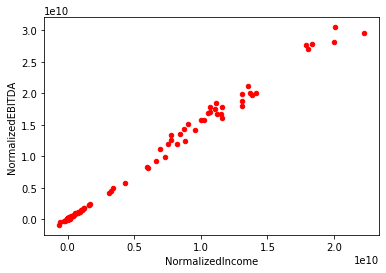

In [53]:
df_clean.plot(kind='scatter',x='NormalizedIncome',y='NormalizedEBITDA',color='red')

In [55]:
import seaborn as sn
import matplotlib.pyplot as plt
corrMatrix = df_clean_scaled.iloc[0:5,0:5].corr()
print (corrMatrix)

# sn.heatmap(corrMatrix, annot=True)
# plt.show()

                                   OperatingCashFlow  \
OperatingCashFlow                           1.000000   
NetIncomeFromContinuingOperations           0.553577   
DepreciationAmortizationDepletion          -0.886156   
DeferredTax                                 0.961660   

                                   NetIncomeFromContinuingOperations  \
OperatingCashFlow                                           0.553577   
NetIncomeFromContinuingOperations                           1.000000   
DepreciationAmortizationDepletion                          -0.825992   
DeferredTax                                                 0.674923   

                                   DepreciationAmortizationDepletion  \
OperatingCashFlow                                          -0.886156   
NetIncomeFromContinuingOperations                          -0.825992   
DepreciationAmortizationDepletion                           1.000000   
DeferredTax                                                -0.928397  

Text(0, 0.5, 'Stock Price')

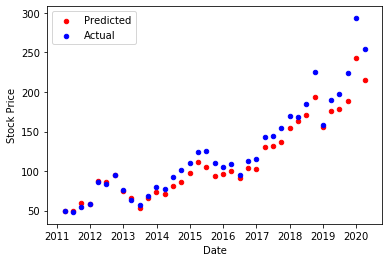

In [56]:
df_predict_test_T = df_predict_test.T.reset_index(level=0)
df_predict_test_T.columns=['Date','Predict','Actual']
ax = plt.gca()
df_predict_test_T.plot(kind='scatter',x='Date',y='Predict',color='red',ax=ax)
df_predict_test_T.plot(kind='scatter',x='Date',y='Actual',color='blue',ax=ax)
ax.legend(["Predicted", "Actual"]);
ax.set_ylabel("Stock Price")

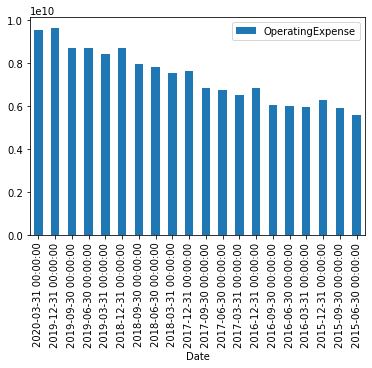

In [57]:
df_clean.head(20).plot(kind='bar', x='Date',y='OperatingExpense')
# df_clean.head()

# Visualize coefficient

In [58]:
df_coef = pd.DataFrame([lr.coef_],columns=features)

In [59]:
df_coef_T=df_coef.T.reset_index(level=0)
df_coef_T.columns=['independent','coef']
# df_coef_T=df_coef_T.sort_values('coef',ascending=False)
df_coef_T=df_coef_T.sort_values('coef',ascending=True)
df_coef_T.head(10)
# df.plot(kind='bar',x='independent',y='coef')

,independent,coef
37,NetIncomeFromContinuingOperations,-3909.998697
20,EBIT,-455.816119
45,NormalizedIncome,-319.541326
59,ReconciledCostOfRevenue,-180.363574
54,PretaxIncome,-45.889865
69,TotalCapitalization,-31.774795
19,DepreciationAmortizationDepletion,-19.739122
48,OperatingIncome,-19.576900
28,GrossProfit,-17.832002
42,NetTangibleAssets,-17.132131


In [60]:
df_coef_T=df_coef_T.sort_values('coef',ascending=False)
df_coef_T.head(10)

,independent,coef
36,NetIncomeContinuousOperations,4275.328695
44,NormalizedEBITDA,462.541504
15,CostOfRevenue,83.153630
71,TotalExpenses,73.251705
76,TotalRevenue,43.877639
33,MarketCap,36.097782
13,CommonStockEquity,32.972773
64,TangibleBookValue,14.419912
66,TaxProvision,13.303744
30,InvestedCapital,7.524194


# Export data

In [62]:
col_10 = [
    'Date',
    'Close',
    'NetIncomeContinuousOperations', 
    'NormalizedEBITDA', 
    'TotalExpenses', 
    'MarketCap', 
    'InvestedCapital',
    'NormalizedIncome',
    'TotalCapitalization',
    'NetTangibleAssets',
    'GrossProfit',
    'DepreciationAmortizationDepletion'
]
df_coef_T_10=df_coef_T.loc[df_coef_T['independent'].isin(col_10)]
df_coef_T_10['coef'] = mms.fit_transform(df_coef_T_10['coef'].to_numpy().reshape(-1, 1))
df_coef_T_10

,independent,coef
36,NetIncomeContinuousOperations,1.000000
44,NormalizedEBITDA,0.170208
71,TotalExpenses,0.085485
33,MarketCap,0.077399
30,InvestedCapital,0.071181
42,NetTangibleAssets,0.065815
28,GrossProfit,0.065662
19,DepreciationAmortizationDepletion,0.065247
69,TotalCapitalization,0.062628
45,NormalizedIncome,0.000000


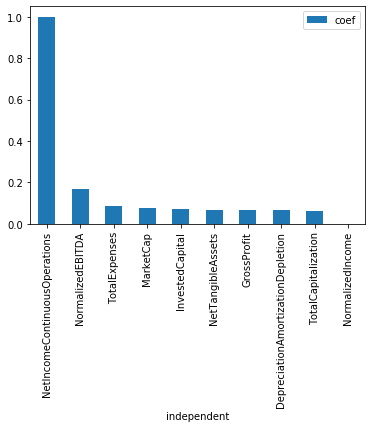

In [63]:
df_coef_T_10.head(10).plot(kind='bar', x='independent',y='coef')

In [64]:
## export data for barchart
df_coef_T_10.to_csv('../data/bar_data.csv',index=False)

In [65]:
## export data for line chart
df_clean_scaled[col_10].to_csv('../data/scatter_line_data.csv',index=False)

In [66]:
## export data for scatter plot predict
df_predict_test_T.to_csv('../data/predict_data.csv',index=False)
# df_predict_test_T

In [67]:
df_clean.sort_values('Date',ascending=True).set_index('Date').diff()

,OperatingCashFlow,NetIncomeFromContinuingOperations,DepreciationAmortizationDepletion,DeferredTax,ChangeInWorkingCapital,ChangeInReceivables,ChangeInInventory,ChangeInPayablesAndAccruedExpense,ChangeInOtherCurrentAssets,ChangeInOtherCurrentLiabilities,...,PsRatio,PbRatio,EnterprisesValueRevenueRatio,EnterprisesValueEBITDARatio,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,,,,,,,,,,,,,,,
1989-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-03-31,4.22e+07,7.1e+06,-3.6e+06,1.98e+07,1.93e+07,4.65e+07,6.53e+07,5.25e+07,-3.58e+07,-1.092e+08,...,0.082,0.246,0.687,1.768,0.1875,0.1875,0.200892,0.178571,0.14817,1.77352e+07
1990-06-30,-1.5e+06,-1.22e+07,5.7e+06,-8.4e+06,1.29e+07,-1.371e+08,-9.35e+07,6.61e+07,6.55e+07,1.119e+08,...,0.058,0.236,0.078,1.645,0.107143,0.138393,0.098215,0.160714,0.134,2.54604e+07
1990-09-30,-2.041e+08,-2.12e+07,1.09e+07,-3.93e+07,-1.548e+08,-9.5e+06,-8.42e+07,-4.06e+07,4e+06,-2.45e+07,...,-0.375,-1.233,-1.467,-6.935,-0.517857,-0.566965,-0.553572,-0.5625,-0.455119,-3.72876e+07
1990-12-31,1.292e+08,5.2e+07,-1.37e+07,3.21e+07,5.93e+07,-3.53e+07,1.06e+07,7.41e+07,-1.83e+07,2.82e+07,...,0.297,0.961,0.508,1.809,0.517857,0.508929,0.553572,0.5,0.412242,-3.2942e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-03-31,-1.5535e+10,-8.404e+09,-3.55e+08,-2.3e+08,-6.394e+09,-1.36e+09,1.146e+09,-3.022e+09,1.055e+09,-4.413e+09,...,0.591,0.46,6.505,23.609,31.3,30.72,32.06,32.21,32.3711,-1.14395e+07
2019-06-30,4.81e+08,-1.517e+09,-1.07e+08,2.63e+08,1.824e+09,-1.0889e+10,1.432e+09,1.1743e+10,1.241e+09,-1.637e+09,...,0.123,1.049,1.602,8.254,8.84999,9.42,8.51001,7.97,8.59608,7.5466e+06
2019-09-30,8.274e+09,3.642e+09,2.46e+08,-3.88e+08,4.958e+09,-1.9106e+10,-2.287e+09,1.7661e+10,-1.23e+09,9.533e+09,...,0.406,1.845,-1.773,-9.88,22.22,25.08,23.74,26.05,26.5837,-5.1332e+06


In [68]:
df_clean.sort_values('Date',ascending=True)

,Date,OperatingCashFlow,NetIncomeFromContinuingOperations,DepreciationAmortizationDepletion,DeferredTax,ChangeInWorkingCapital,ChangeInReceivables,ChangeInInventory,ChangeInPayablesAndAccruedExpense,ChangeInOtherCurrentAssets,...,PsRatio,PbRatio,EnterprisesValueRevenueRatio,EnterprisesValueEBITDARatio,Open,High,Low,Close,Adj Close,Volume
121,1989-12-31,2.611e+08,1.248e+08,4.78e+07,3.39e+07,5.41e+07,4.38e+07,4.88e+07,-7.54e+07,-2.48e+07,...,0.856,2.971,2.7,16.955,1.24107,1.27679,1.22768,1.25893,1.01819,3.81024e+07
120,1990-03-31,3.033e+08,1.319e+08,4.42e+07,5.37e+07,7.34e+07,9.03e+07,1.141e+08,-2.29e+07,-6.06e+07,...,0.938,3.217,3.387,18.723,1.42857,1.46429,1.42857,1.4375,1.16636,5.58376e+07
119,1990-06-30,3.018e+08,1.197e+08,4.99e+07,4.53e+07,8.63e+07,-4.68e+07,2.06e+07,4.32e+07,4.9e+06,...,0.996,3.453,3.465,20.368,1.53571,1.60268,1.52679,1.59821,1.30036,8.1298e+07
118,1990-09-30,9.77e+07,9.85e+07,6.08e+07,6e+06,-6.85e+07,-5.63e+07,-6.36e+07,2.6e+06,8.9e+06,...,0.621,2.22,1.998,13.433,1.01786,1.03571,0.973214,1.03571,0.845239,4.40104e+07
117,1990-12-31,2.269e+08,1.505e+08,4.71e+07,3.81e+07,-9.2e+06,-9.16e+07,-5.3e+07,7.67e+07,-9.4e+06,...,0.918,3.181,2.506,15.242,1.53571,1.54464,1.52679,1.53571,1.25748,1.10684e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,2019-03-31,1.1155e+10,1.1561e+10,3.04e+09,-1.77e+08,-4.622e+09,1.0675e+10,7e+07,-1.1523e+10,1.69e+08,...,3.561,7.423,15.926,51.783,189.83,190.08,188.54,189.95,186.99,2.3564e+07
3,2019-06-30,1.1636e+10,1.0044e+10,2.933e+09,8.6e+07,-2.798e+09,-2.14e+08,1.502e+09,2.2e+08,1.41e+09,...,3.684,8.472,17.528,60.037,198.68,199.5,197.05,197.92,195.586,3.11106e+07
2,2019-09-30,1.991e+10,1.3686e+10,3.179e+09,-3.02e+08,2.16e+09,-1.932e+10,-7.85e+08,1.7881e+10,1.8e+08,...,4.09,10.317,15.755,50.157,220.9,224.58,220.79,223.97,222.169,2.59774e+07
1,2019-12-31,3.0516e+10,2.2236e+10,2.816e+09,-3.49e+08,4.245e+09,5.917e+09,-2.8e+07,-1.089e+09,-7.054e+09,...,5.247,14.23,14.105,43.875,289.93,293.68,289.52,293.65,292.164,2.52014e+07


In [69]:
df_clean.to_csv('../data/clean.csv', index=False)

# Matplotlib

In [70]:
import matplotlib.pyplot as plt
%matplotlib inline 

# Set matplotlib sizes
plt.rc('font', size=20)
plt.rc('axes', titlesize=20)
plt.rc('axes', labelsize=20)
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)
plt.rc('legend', fontsize=20)
plt.rc('figure', titlesize=20)

ValueError: x and y must be the same size

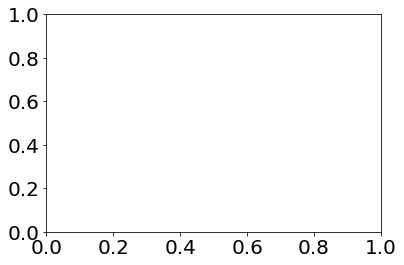

In [71]:
# # The scatter plot between LotFrontage and SalePrice
# plt.scatter(X_train['OperatingCashFlow'], y_train, color='green', edgecolor='white', s=100)

# # Get the prediction on the training data using lr
# y_train_pred = lr.predict(X_train[['OperatingCashFlow']])

# # The line plot
# plt.plot(X_train[['OperatingCashFlow']], y_train_pred, color='red', lw=3, alpha=0.6)  

# # Set x-axis
# plt.xlabel('OperatingCashFlow', fontsize=20)
# plt.xticks(fontsize=20)

# # Set y-axis
# plt.ylabel(target, fontsize=20)
# plt.yticks(fontsize=20)

# # Save and show the figure
# plt.tight_layout()
# # plt.savefig('./figure/simple_linear_regression_LotFrontage_SalePrice.pdf')
# plt.show()
plt.scatter(X_test, y_test, color = "red")
plt.plot(X_test, lr.predict(X_test), color = "green")
plt.title("Salary vs Experience (Training set)")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.show()